In [1]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the packages

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Data sourcing

In [3]:
# Importing the csv file here
uber = pd.read_csv("Uber Request Data.csv")
uber.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [4]:
#Inspecting the dataframe
print(uber.shape)
print(uber.info())
print(uber.describe())

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB
None
        Request id    Driver id
count  6745.000000  4095.000000
mean   3384.644922   149.501343
std    1955.099667    86.051994
min       1.000000     1.000000
25%    1691.000000    75.000000
50%    3387.000000   149.000000
75%    5080.000000   224.000000
max    6766.000000   300.000000


### Checking for data quality issues and cleaning

In [5]:
#replacing space in column with '_'
uber.columns = uber.columns.str.replace(' ', '_')
uber.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
#checking for any duplicate rows
uber.duplicated(subset='Request_id',keep= False).sum()

0

In [7]:
#checking for any spelling mistake in Pickup point
uber['Pickup_point'].unique()
#no spelling mistake

array(['Airport', 'City'], dtype=object)

In [8]:
#checking for any spelling mistake in status
uber['Status'].unique()
#no spelling mistake

array(['Trip Completed', 'Cancelled', 'No Cars Available'], dtype=object)

In [9]:
#Inspecting Null values
uber.isnull().sum()
# It looks valid to have driver id and drop timestamp to have null values.
#Hence these null values are retained as such in the data.

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

### Data preparation

In [10]:
#as we saw that'Request timestamp and Drop timestamp' is object type
#converting Request timestamp and Drop timestamp to datetime type- by creating new columns

uber['request_Date_Time'] = pd.to_datetime(uber['Request_timestamp'],dayfirst=True)
uber['drop_Date_Time'] = pd.to_datetime(uber['Drop_timestamp'],dayfirst=True)
uber.head(15)


,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp,request_Date_Time,drop_Date_Time
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47,2016-07-13 08:33:16,2016-07-13 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59,2016-07-13 21:57:28,2016-07-13 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15,2016-07-14 06:15:32,2016-07-14 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52,2016-07-15 05:11:52,2016-07-15 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51,2016-07-15 17:57:27,2016-07-15 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25,2016-07-11 06:46:00,2016-07-11 07:25:00


In [11]:
#checking if request_Date_Time and drop_Date_Time got converted to datetime type or not
print(uber.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            4095 non-null float64
Status               6745 non-null object
Request_timestamp    6745 non-null object
Drop_timestamp       2831 non-null object
request_Date_Time    6745 non-null datetime64[ns]
drop_Date_Time       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 421.6+ KB
None


In [12]:
#dropping Request_timestamp column and Drop_timestamp  as it is not required any further
uber = uber.drop('Request_timestamp', axis=1)
uber = uber.drop('Drop_timestamp', axis=1)
uber.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [13]:
#Inspecting the dataframe after the drop
print(uber.shape)
print(uber.info())

(6745, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request_id           6745 non-null int64
Pickup_point         6745 non-null object
Driver_id            4095 non-null float64
Status               6745 non-null object
request_Date_Time    6745 non-null datetime64[ns]
drop_Date_Time       2831 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.2+ KB
None


#### Data preparation:
#### i)Handling request_Date_Time

In [14]:
#checking if there are any NA's coerced because of invalid values in request_Date_Time
uber['request_Date_Time'].isna().sum()

0

In [15]:
#extracting date and time from request_Date_Time

uber['request_Date'] = uber['request_Date_Time'].dt.date
uber['request_Time'] = uber['request_Date_Time'].dt.time
uber.head(10)

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00


In [16]:
#extracting day of week from request date time
uber['request_DayOfWeek'] = uber['request_Date_Time'].dt.weekday_name
uber.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday


In [17]:
#extracting hour,min and seconds from Request Date_Time

uber['request_hour'] = uber['request_Date_Time'].dt.hour
uber.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8


In [18]:
# creating slot of request hour
uber.loc[uber['request_hour'].between(0,3, inclusive=True),'request_timeslot'] = 'Late night'
uber.loc[uber['request_hour'].between(4,6, inclusive=True),'request_timeslot'] = 'Early morning'
uber.loc[uber['request_hour'].between(7,12, inclusive=True),'request_timeslot'] = 'Morning'
uber.loc[uber['request_hour'].between(13,17, inclusive=True),'request_timeslot'] = 'Afternoon'
uber.loc[uber['request_hour'].between(18,20, inclusive=True),'request_timeslot'] = 'Evening'
uber.loc[uber['request_hour'].between(21,24, inclusive=True),'request_timeslot'] = 'Night'
uber.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,request_timeslot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,Afternoon
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,Morning


In [19]:
#checking if any new columns created has Na's
uber.isna().sum()

Request_id              0
Pickup_point            0
Driver_id            2650
Status                  0
request_Date_Time       0
drop_Date_Time       3914
request_Date            0
request_Time            0
request_DayOfWeek       0
request_hour            0
request_timeslot        0
dtype: int64

#### Data preparation:
#### ii)Handling drop_Date_Time

In [20]:
#extracting date and time from drop_Date_Time

uber['drop_Date'] = uber['drop_Date_Time'].dt.date
uber['drop_Time'] = uber['drop_Date_Time'].dt.time

uber.head(10)

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,request_timeslot,drop_Date,drop_Time
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,Morning,2016-07-11,13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,Afternoon,2016-07-11,18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,Morning,2016-07-12,09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,Night,2016-07-12,22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,Morning,2016-07-13,09:25:47
5,3879,Airport,1.0,Trip Completed,2016-07-13 21:57:28,2016-07-13 22:28:59,2016-07-13,21:57:28,Wednesday,21,Night,2016-07-13,22:28:59
6,4270,Airport,1.0,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,2016-07-14,06:15:32,Thursday,6,Early morning,2016-07-14,07:13:15
7,5510,Airport,1.0,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,2016-07-15,05:11:52,Friday,5,Early morning,2016-07-15,06:07:52
8,6248,City,1.0,Trip Completed,2016-07-15 17:57:27,2016-07-15 18:50:51,2016-07-15,17:57:27,Friday,17,Afternoon,2016-07-15,18:50:51
9,267,City,2.0,Trip Completed,2016-07-11 06:46:00,2016-07-11 07:25:00,2016-07-11,06:46:00,Monday,6,Early morning,2016-07-11,07:25:00


### Data analysis

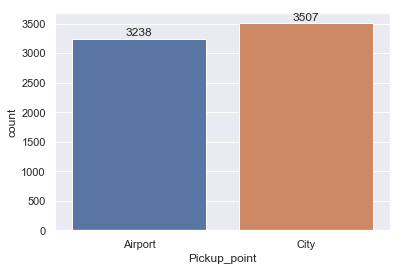

In [21]:
#looking for insight in pickup point
sns.set(style="darkgrid")
ax = sns.countplot(x="Pickup_point", data=uber)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, value, ha="center")
plt.show()

#There isn't much difference in airport and city requests.

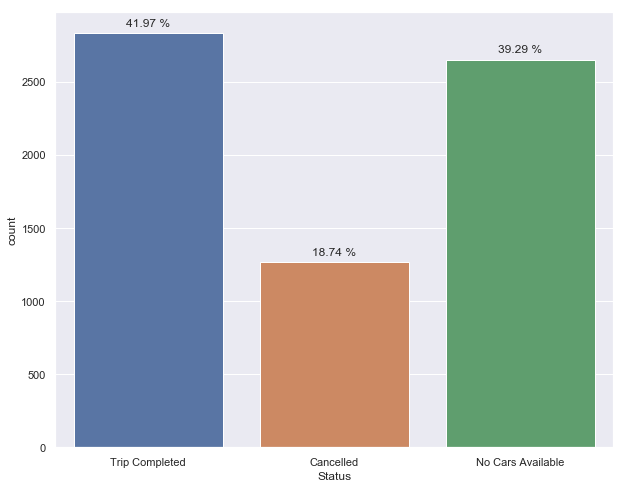

In [22]:
#looking for insight in status
plt.figure(figsize=(10, 8))
ax =sns.countplot(x="Status", data=uber)
total = len(uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+50
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()


#Only 41.97% requests from city and airport request gets completed 

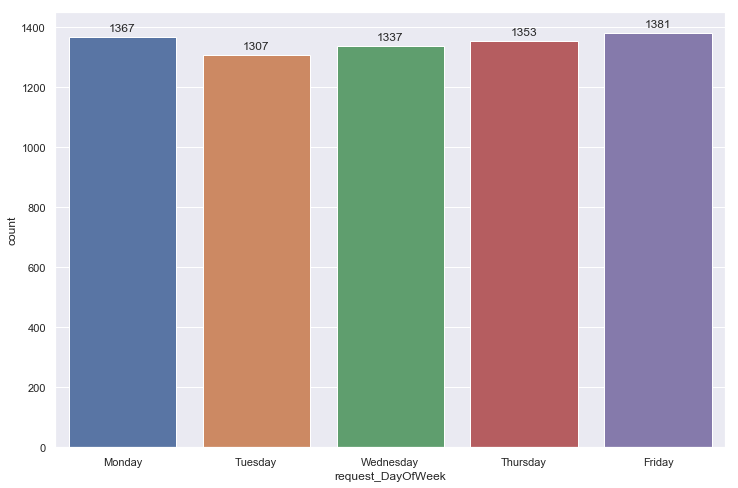

In [23]:
#looking to find the request count vs daysof week
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='request_DayOfWeek', data=uber)
for p in ax.patches:
    value = p.get_height()
    X = p.get_x()+0.4
    Y = p.get_height()+20
    ax.text(X, Y, value, ha="center")
plt.show()

#There isn't much difference in requests vs days of the week

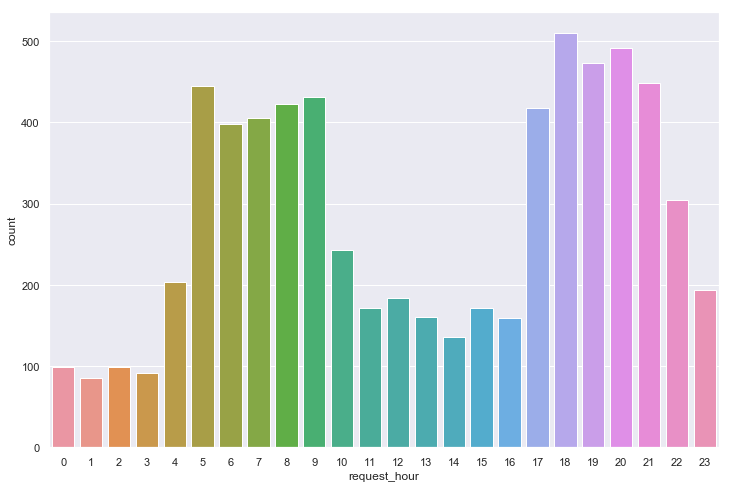

In [24]:
#looking for insight in request hour
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='request_hour', data=uber)
plt.show()

#The below plot clearly depicts that there are high request rates from 5am to 9am and 5pm to 10 pm

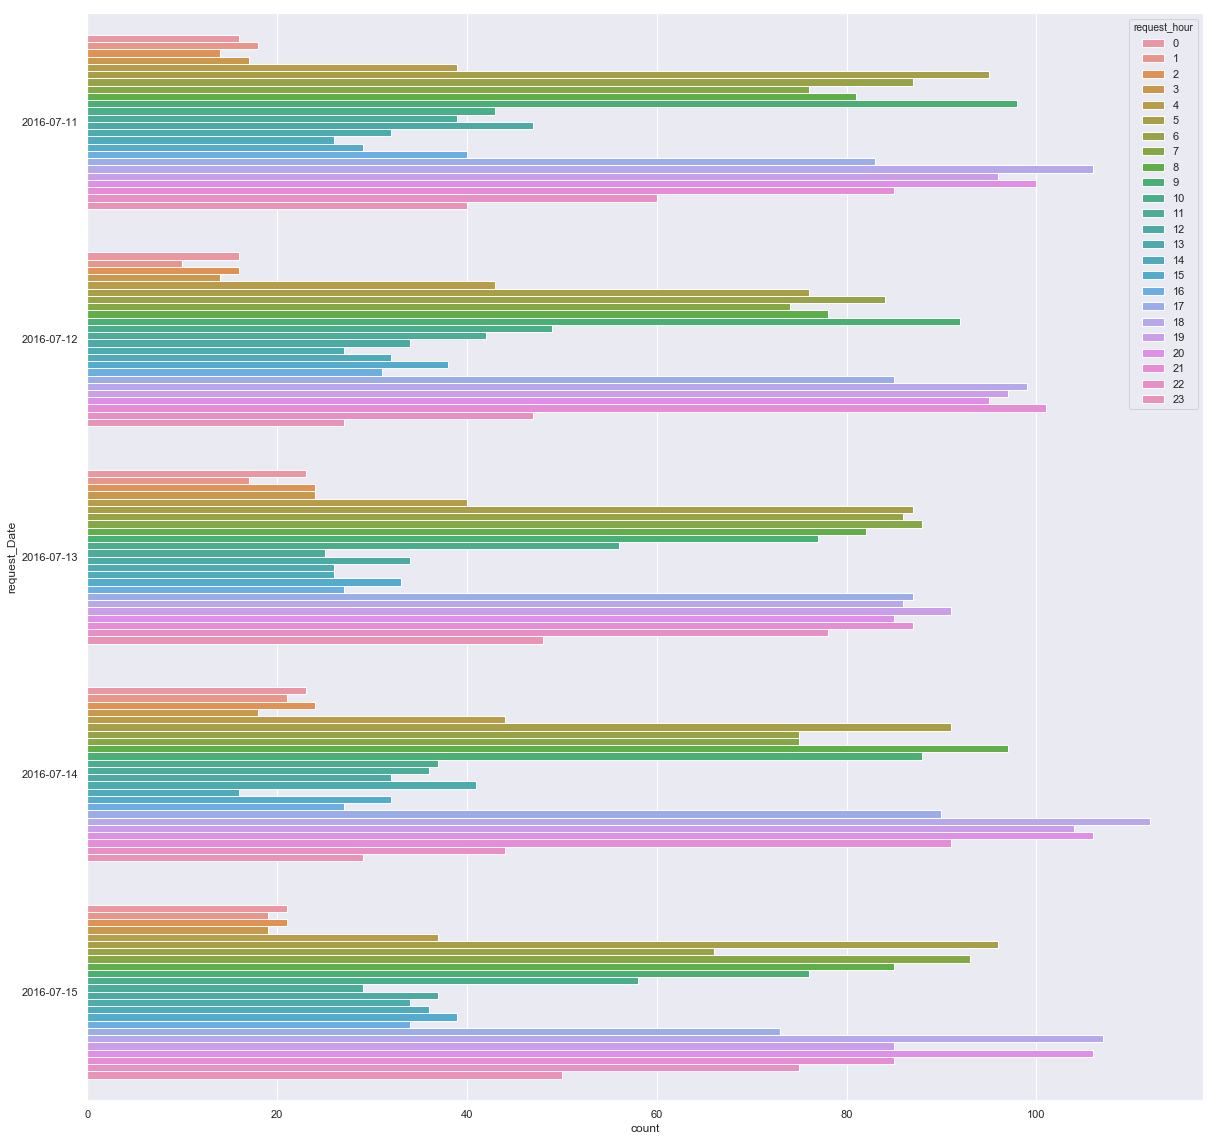

In [25]:
#to check if high request rates from 5am to 9am and 5pm to 10 pm is consistent throughout all days

plt.figure(num=None, figsize=(20, 20), facecolor='w', edgecolor='b')
sns.countplot(y='request_Date',hue="request_hour", data=uber)
plt.show()

#shows that all dates high request rates is around the same time -5am to 9am and 5pm to 10 pm

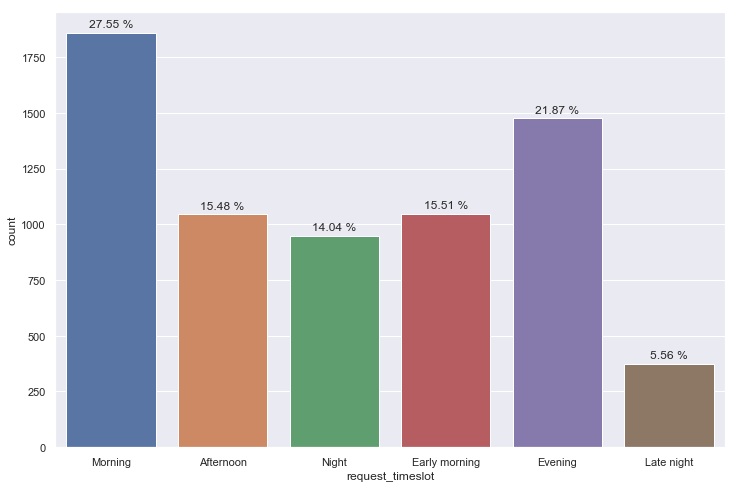

In [26]:
#looking for insight in request timeslot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='b')
ax =sns.countplot(x='request_timeslot', data=uber)
total = len(uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.4
    Y = p.get_height()+25
    ax.text(X, Y, '{:} %'.format(value), ha="center")
plt.show()


#From the below plot it is clear that most of the requests are raised in morning(27.55%) and evening(21.87%) slots
#which is approx. same as the above plots- high request rates are from 5am to 9am and 5pm to 10 pm

#### Observations so far:
 1. Only 41.97% requests from city and airport request gets completed 
 2. High request rates are from morning and evening slot

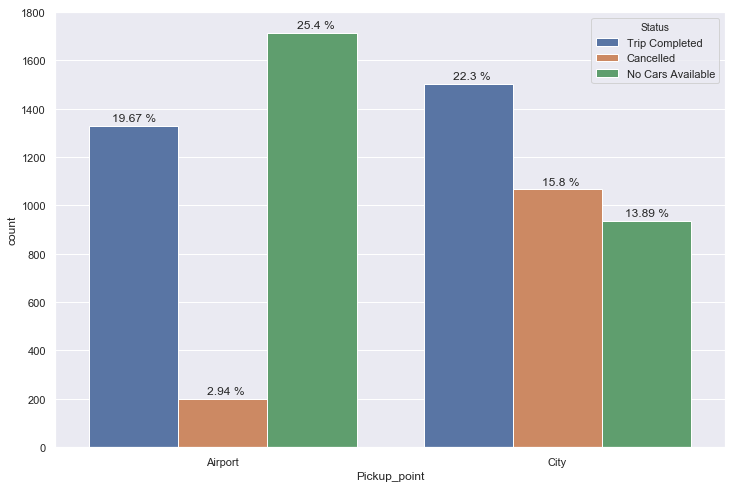

In [27]:
# Segmenting the data:

#segmenting pickup point over status
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='Pickup_point', hue="Status", data=uber)
total = len(uber)
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.2
    Y = p.get_height()+20
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

#The above plot shows that for most of the  Airport pickup requests there are no cars available 
#and most requests that get cancelled are from city pickup requests

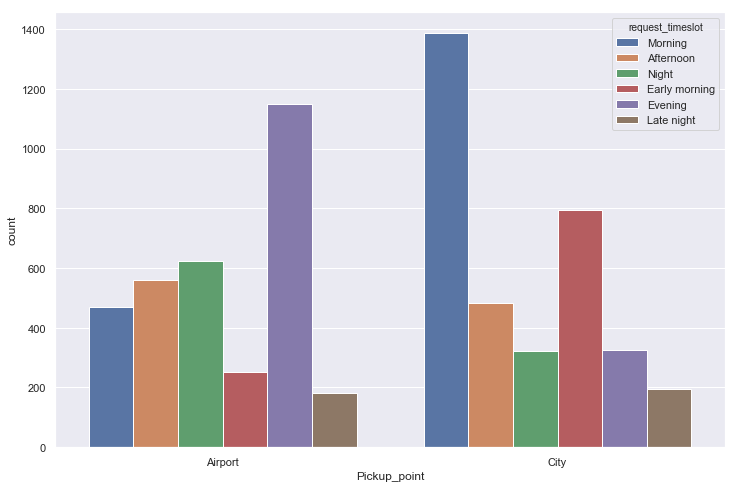

In [28]:
#segmenting pickup point over time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(x='Pickup_point', hue="request_timeslot", data=uber)
plt.show()


# Airport - has the hightest request in the evening
# City- has the hightest request in the morning
# From this graph our previous observation of high request rates of morning and evening slot gets clarified.

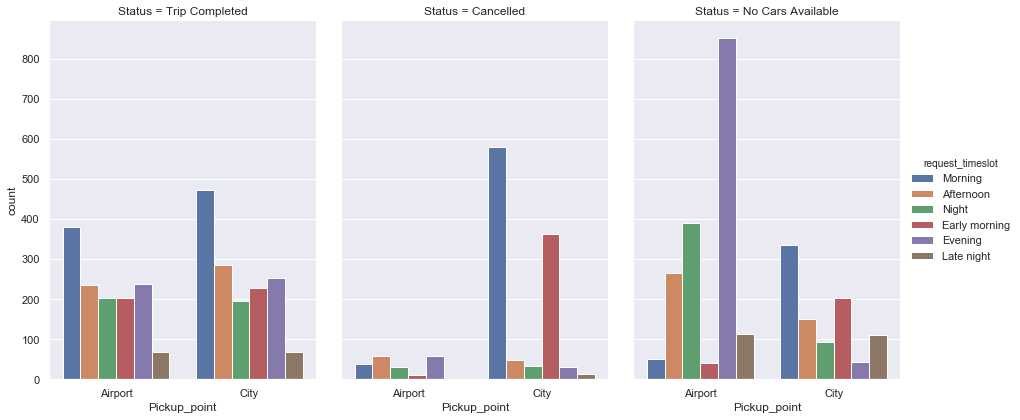

In [29]:
#segmenting the timeslot vs both Status and pickup point 

sns.catplot(x='Pickup_point',col="Status", hue = 'request_timeslot',data=uber ,kind="count",
            height=6,aspect= 0.7,ci=85,col_wrap=3,margin_titles=True)
plt.show()


#From the below plot it is evident that:
#airport requests during the evening slot(during which there is high airport request rate)there are no cars available
#Most city requests get cancelled in the morning slot(during which there is high city request rate) 


#### Observation so far:

The problematic status are cancelled and no cars available as it leads to potential loss of revenue. 
1. Airport pickup point has most 'no car available'
2. City pickup point has highest 'Cancelled' status
3. 'Airport' - has the hightest request in the 'evening' aligning to our 'no car available' status
4. 'City'- has the hightest request in the 'morning' aligning to our 'Cancelled' status.



### Supply and demand gap calculation

In [30]:
#creating demand column
uber.loc[(uber.Status == 'Trip Completed') | (uber.Status == 'Cancelled')| (uber.Status == 'No Cars Available'), 'demand'] = 'Demand' 

In [31]:
#creating supply column
uber.loc[(uber.Status == 'Trip Completed'), 'supply'] = 'Supply'

In [32]:
#creating gap column
uber.loc[(uber.Status == 'Cancelled')| (uber.Status == 'No Cars Available'), 'gap'] = 'Gap' 

In [33]:
uber.head()

,Request_id,Pickup_point,Driver_id,Status,request_Date_Time,drop_Date_Time,request_Date,request_Time,request_DayOfWeek,request_hour,request_timeslot,drop_Date,drop_Time,demand,supply,gap
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11:51:00,Monday,11,Morning,2016-07-11,13:00:00,Demand,Supply,NaN
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17:57:00,Monday,17,Afternoon,2016-07-11,18:47:00,Demand,Supply,NaN
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,09:17:00,Tuesday,9,Morning,2016-07-12,09:58:00,Demand,Supply,NaN
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21:08:00,Tuesday,21,Night,2016-07-12,22:03:00,Demand,Supply,NaN
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,08:33:16,Wednesday,8,Morning,2016-07-13,09:25:47,Demand,Supply,NaN


In [34]:
#calculating demand count
uber['demand'].count()

6745

In [35]:
#calculating supply count
uber['supply'].count()

2831

In [36]:
#calculating gap count
uber['gap'].count()

3914

In [37]:
uber_SupplyandDemand = pd.DataFrame([uber.demand,uber.supply,uber.gap]).transpose()
uber_SupplyandDemand.head()

,demand,supply,gap
0,Demand,Supply,NaN
1,Demand,Supply,NaN
2,Demand,Supply,NaN
3,Demand,Supply,NaN
4,Demand,Supply,NaN


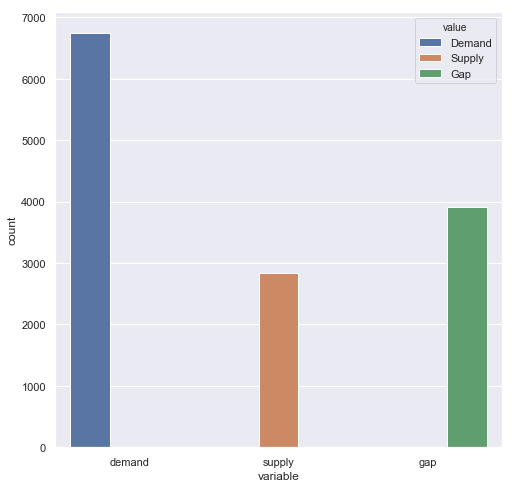

In [38]:
# plotting demand, supply and gap count
plt.figure(num=None, figsize=(8, 8), facecolor='w', edgecolor='k')
sns.countplot(x="variable",hue="value", data=pd.melt(uber_SupplyandDemand))
plt.show()

#this clearly shows that gap exist and there is huge possible to bridge the gap and increase the revenue.
# Gap = Demand -Supply
#Around 58.02% of 'gap' exist.

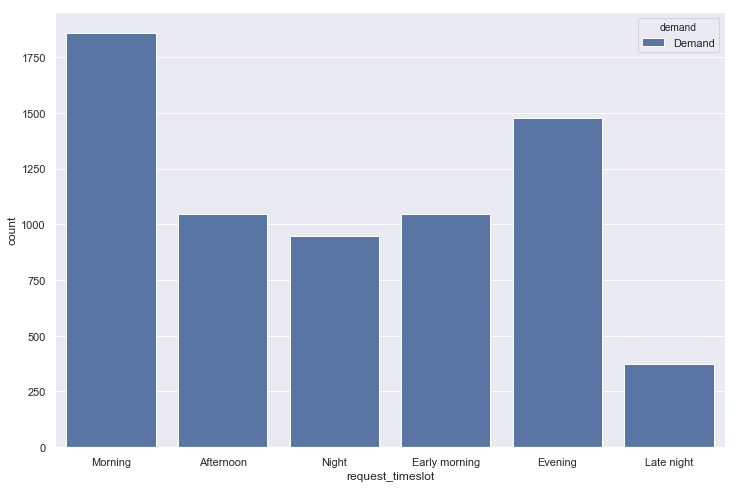

In [39]:
#segmenting demand across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
sns.countplot(hue='demand',x="request_timeslot", data=uber)
plt.show()

#Below graph shows that morning and evening has the hightest demand for cabs

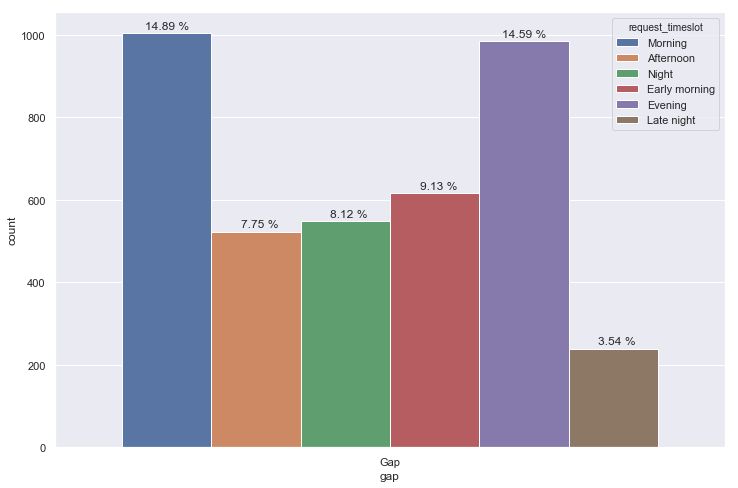

In [40]:
#segmenting gap across the request time slot
plt.figure(num=None, figsize=(12, 8), facecolor='w', edgecolor='k')
ax =sns.countplot(x='gap',hue="request_timeslot", data=uber)
total = len(uber['gap'])
for p in ax.patches:
    value = round((p.get_height()/total)*100,2)
    X = p.get_x()+0.1
    Y = p.get_height()+10
    ax.text(X, Y, '{:} %'.format(value), ha="right")
plt.show()

#This shows that gap is mainly in the morning and evening time slot, which again is in sync with all our above findings.


#### In the above graph - the percentage is taken only across the total gap percentage which is 58.02%

    a. From the total gap percentage(58.02%) -around 15% gap exist during morning and evenings.


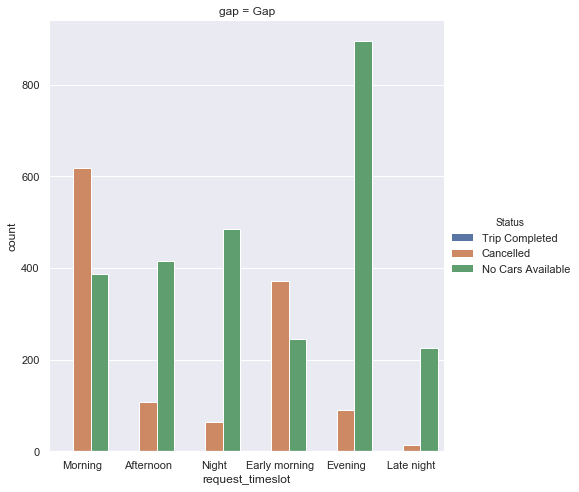

In [41]:
#segmenting gap across the status and request timeslot
sns.catplot(x='request_timeslot',col="gap", hue = 'Status',data=uber ,kind="count", height=7,aspect= 0.9,ci=85)
plt.show()


#As gap is sum of (cancelled + No cars available) : We can see that there is no plot in trip completed(Obvious).
# Hightest 'cancelled' gap comes from morning slot.
# Hightest 'No car available' gap comes from evening slot.

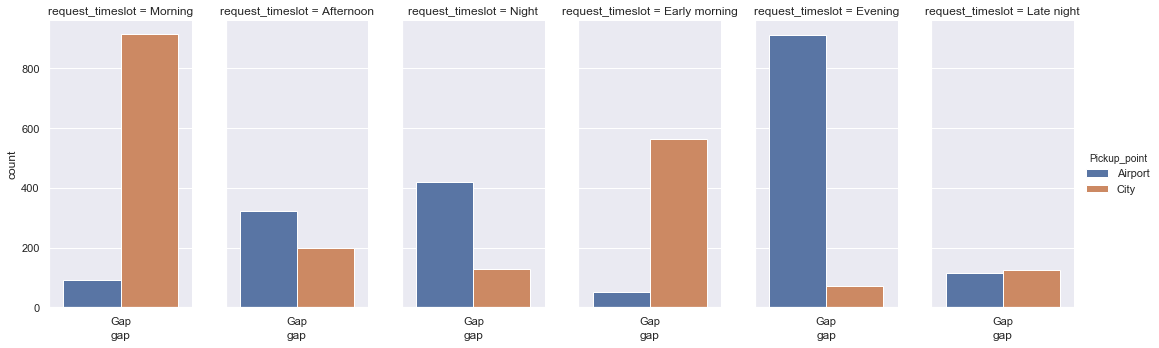

In [42]:
#segmenting gap across the pickup point and request timeslot
sns.catplot(x='gap',col="request_timeslot", hue = 'Pickup_point',data=uber ,kind="count", height=5,aspect= 0.5,
            ci=85)
plt.show()


# the graph belows shows that:
# 1.In the morning, City pickup has the highest gap.
# 2. in the evening, Airport pickup has the highest gap.

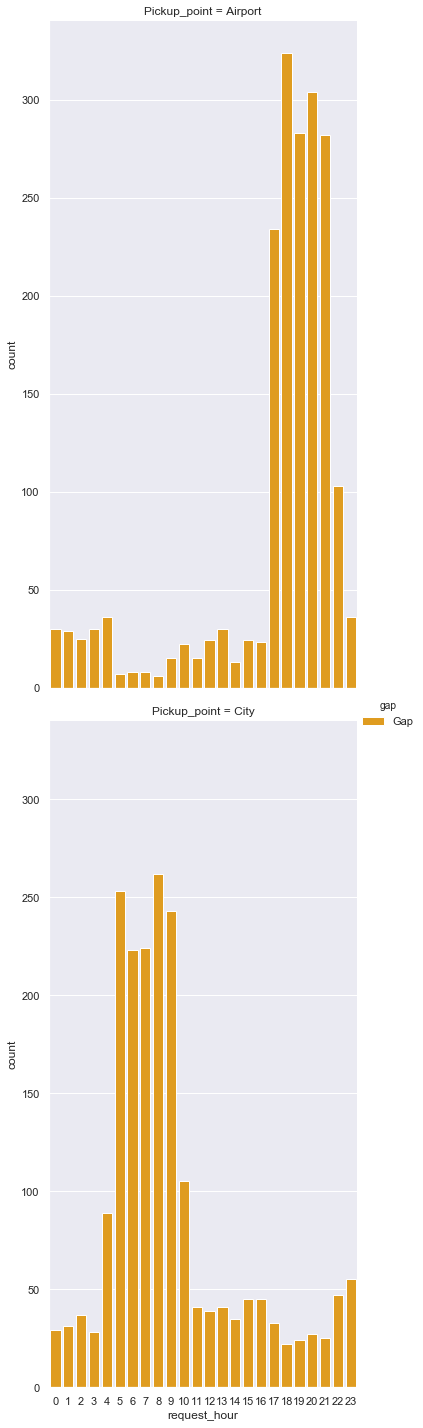

In [43]:
#segmenting the gap across the request hour and pickup point
#plt.figure(num=None, figsize=(13, 5), facecolor='w', edgecolor='k')
sns.catplot(x='request_hour',col="Pickup_point", hue = 'gap',data=uber ,kind="count", height=10,aspect= 0.5,
            ci=85,col_wrap=1,palette=sns.color_palette(['orange']))
plt.show()


# the graph belows shows that:
# 1. Airport has hightest gap at 17-21 hours which is evening hours
# 2. City has hightest gap at 5-9am hours which is morning hours
# And vice versa is not true

### Observation so far:

The problematic status are 'cancelled' and 'no cars available' as it leads to potential loss of revenue. We observed the hightest value of:

    Status: "No car available"
    Where is it happening: Airport - i.e airport to city
    When is it happening: Evening 

    Status: "Cancelled"
    Where is it happening: City - i.e city to airport
    When is it happening: Morning

The above points are in sync with highest request rates coming from morning and evening slot.

To make our analayse our observation so far, we further looked into the 'gap'. This again is in sync with above observations.
The 'gap' which exists are the hightest:
 
    Status: "No car available"
    Where is it happening: Airport - i.e airport to city
    When is it happening: Evening 

    Status: "Cancelled"
    Where is it happening: City - i.e city to airport
    When is it happening: Morning. 

And vice versa is not true:

       1. Morning hours :There is no high demand for cabs from airport to city 
       2. Evening hours: There is no high demand for cabs from city to airport
       
This tells us that there are more outbound flights in the morning and inbound flights in the evening.       



### The reason for the issue:

    In the morning hours: Though there is high demand for cabs from city to airport, the vice versa is not true.
                          Hence the driver tends to 'cancel' the request as getting a return trip from airport 
                          to city would be tough.
    
    In the evening hours: Though there is high demand for cabs from airport to city, the vice versa is not true.
                          Hence 'no cars available' in the airport is the hightest in the evening.

### Possible suggestions to fill the supply demand gap:

1. Provide incentives for airport trips during peak time.
2. Assigning few extra cabs specially to the airport trips.
3. Fixing a base price for drivers idle time in the airport or to come back to the city without any passenger.
4. Impose penalty for cancellation of requests by the drivers. Set a threshold for the maximum cancellation per day.
5. Promote continuous trip to airport with incentives.
6. Promote advance booking to airports and at the same time keeping drivers updated will the flight schedule with help them plan their work and they can accept the request as per their work plan.

    
        